In [99]:
#I choose dataset from this link "http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#"
#The data is related with direct marketing campaigns of a Portuguese banking institution. 
#The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
# bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)
#bank-full.csv with all examples and 20 inputs
#The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

#Attribute Information:
#Input variables:
# bank client data:
#1 - age (numeric)
#2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
#3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
#4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
#5 - default: has credit in default? (categorical: 'no','yes','unknown')
#6 - housing: has housing loan? (categorical: 'no','yes','unknown')
#7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#  related with the last contact of the current campaign:
#8 - contact: contact communication type (categorical: 'cellular','telephone')
#9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
#11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
# Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for 
# benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
#12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14 - previous: number of contacts performed before this campaign and for this client (numeric)
#15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
#16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#17 - cons.price.idx: consumer price index - monthly indicator (numeric)
#18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
#19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#20 - nr.employed: number of employees - quarterly indicator (numeric)

#Potential Questions for this dataset
# Is gende rrelevant? 
# Is agent experience relevant? 
#Are social status and stability relevant? 
#Is phone call context relevant? 
#Are date and time conditions relevant? 
#Are social and economic indicators relevant? 
#Are financial assets relevant? 
#Can age be related to output? 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/bankaddition/bank_additional_full.csv')
print(df.head(20))


    age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
5    45     services   married             basic.9y  unknown      no   no   
6    59       admin.   married  professional.course       no      no   no   
7    41  blue-collar   married              unknown  unknown      no   no   
8    24   technician    single  professional.course       no     yes   no   
9    25     services    single          high.school       no     yes   no   
10   41  blue-collar   married              unknown  unknown      no   no   
11   25     services    single          high.school       no     yes   no   

In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
# this is a very imbalanced dataset
# there are 36548 data points are having y as'no', but only 4640 as'yes'
#dataset needs oversampling or undersampling to deal with unbalanced dataset for later

#print(df['y'])
print(df['y'].value_counts())
#plot countplot for y column

no     36548
yes     4640
Name: y, dtype: int64


In [6]:
print(df['marital'])
variable_marital=df['marital']
print(df['marital'].value_counts())

0         married
1         married
2         married
3         married
4         married
5         married
6         married
7         married
8          single
9          single
10        married
11         single
12         single
13       divorced
14        married
15        married
16        married
17        married
18        married
19         single
20        married
21        married
22         single
23         single
24        married
25        married
26        married
27        married
28         single
29        married
           ...   
41158    divorced
41159    divorced
41160     married
41161     married
41162     married
41163    divorced
41164     married
41165    divorced
41166     married
41167     married
41168     married
41169     married
41170    divorced
41171     married
41172      single
41173     married
41174     married
41175      single
41176    divorced
41177     married
41178     married
41179    divorced
41180     married
41181     married
41182     

In [7]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

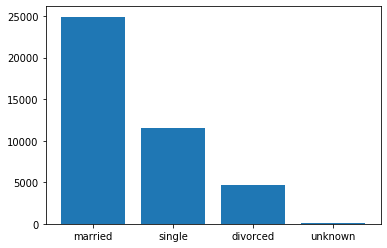

In [8]:
y_pos = np.arange(len(df['marital'].value_counts().index))
plt.bar(y_pos, df['marital'].value_counts().tolist())
plt.xticks(y_pos, df['marital'].value_counts().index)
plt.show()
# The histogram plot shows majority of the client in this dataset are married

In [9]:
print(df['marital'].value_counts()[0])
print(df['marital'].value_counts()[1])
print(df['marital'].value_counts()[2])
print(df['marital'].value_counts()[3])

24928
11568
4612
80


In [10]:
df['marital'].value_counts().index

Index(['married', 'single', 'divorced', 'unknown'], dtype='object')

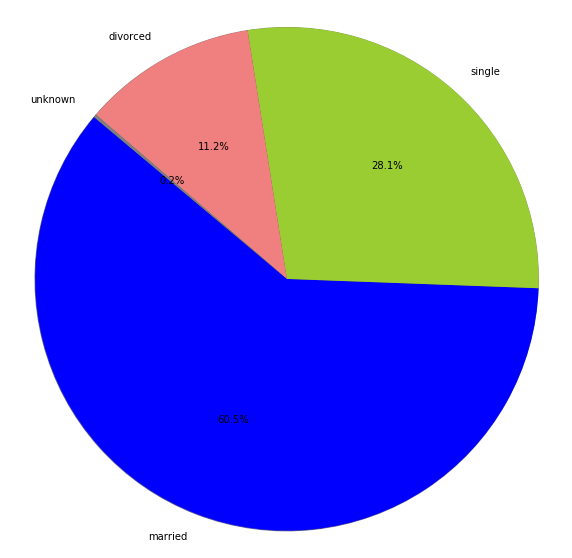

In [11]:
#plot pie plot on marital column
fig= plt.figure(figsize=(10,10))
labels = 'married', 'single', 'divorced', 'unknown'
sizes = [24928, 11568, 4612, 80]
colors = ['blue', 'yellowgreen', 'lightcoral', 'grey']
explode = (0, 0, 0, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,radius=20)

plt.axis('equal')
plt.show()
# The pie plot shows majority (60.5%) of the client in this dataset are married

In [12]:
print(df['job'])
variable_job=df['job']
print(df['job'].value_counts())

0            housemaid
1             services
2             services
3               admin.
4             services
5             services
6               admin.
7          blue-collar
8           technician
9             services
10         blue-collar
11            services
12         blue-collar
13           housemaid
14         blue-collar
15             retired
16         blue-collar
17         blue-collar
18         blue-collar
19          management
20          unemployed
21         blue-collar
22             retired
23          technician
24              admin.
25          technician
26          technician
27       self-employed
28          technician
29             unknown
             ...      
41158       technician
41159       technician
41160           admin.
41161           admin.
41162      blue-collar
41163       technician
41164           admin.
41165        housemaid
41166           admin.
41167           admin.
41168     entrepreneur
41169         services
41170      

<class 'pandas.core.series.Series'>


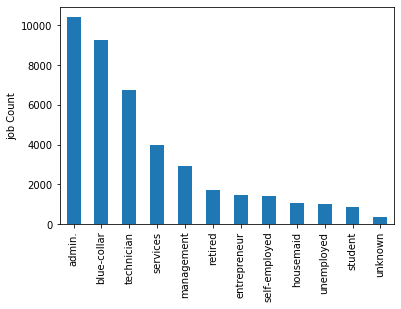

In [13]:
#count plot for job column
df['job'].value_counts().plot(kind='bar')
plt.ylabel('job Count')
#count plot is a kind of series plot
print(type(df['job'].value_counts()))

# The histogram below shows that most 3 common occupation of the clients in this 
# datasets are admin, blue collar and techician

In [14]:
print(df['education'])
variable_education=df['education']
print(df['education'].value_counts())

0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
5                   basic.9y
6        professional.course
7                    unknown
8        professional.course
9                high.school
10                   unknown
11               high.school
12               high.school
13                  basic.4y
14                  basic.6y
15                  basic.9y
16                  basic.6y
17                  basic.6y
18                  basic.9y
19                  basic.9y
20               high.school
21                  basic.4y
22               high.school
23               high.school
24               high.school
25         university.degree
26                   unknown
27                  basic.9y
28         university.degree
29         university.degree
                ...         
41158               basic.4y
41159               basic.4y
41160      university.degree
41161      uni

Text(0, 0.5, 'education level Count')

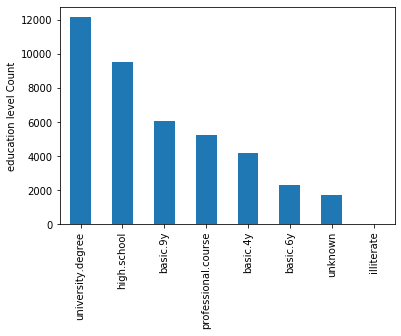

In [15]:
df['education'].value_counts().plot(kind='bar')
plt.ylabel('education level Count')

# The histogram below shows that top 3 common education level in this data sets are university degree, 
# high school and basic 9 years

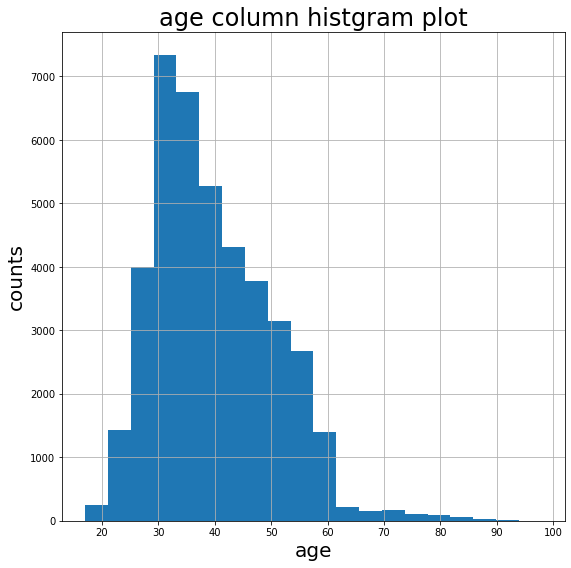

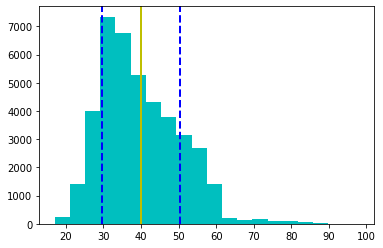

In [16]:
df['age'].isnull().values.any()
df['age'].hist(bins=20,figsize=(9,9))
#set the bins range to values on the graph
#everytime extracting one column from data, it will be a series
plt.xlabel("age",fontsize=20)
plt.ylabel("counts",fontsize=20)
plt.title("age column histgram plot",fontsize=24)
plt.show()
#this is not normal distribution,it's skewed 

#using plt historgram function to plot again with the mean,and std lines on the plot
plt.hist(df['age'], bins=20, color='c')
# Add a vertical line at the mean.
plt.axvline(df['age'].mean(), color='y', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(df['age'].mean() + df['age'].std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(df['age'].mean()-df['age'].std(), color='b', linestyle='dashed', linewidth=2) 

# The histogram below shows the age data is not normal distribution, and the mean is around 40, and the one std below mean is 30, 
# and one std higher than mean is 50

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1dbb07748>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1dbb07e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1dbb07358>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1dbb12518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1dbb12860>],
 'means': []}

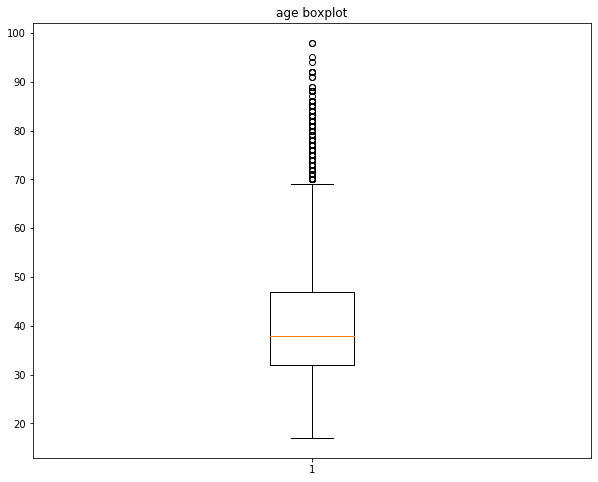

In [17]:
#boxplot for age
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.set_title('age boxplot')
ax1.boxplot(df['age'])
# the boxplot below shows that median value of all the clients age is around 36-38, and a few outliers which their ages 
# ranges around 90-100

Text(0, 0.5, 'counts')

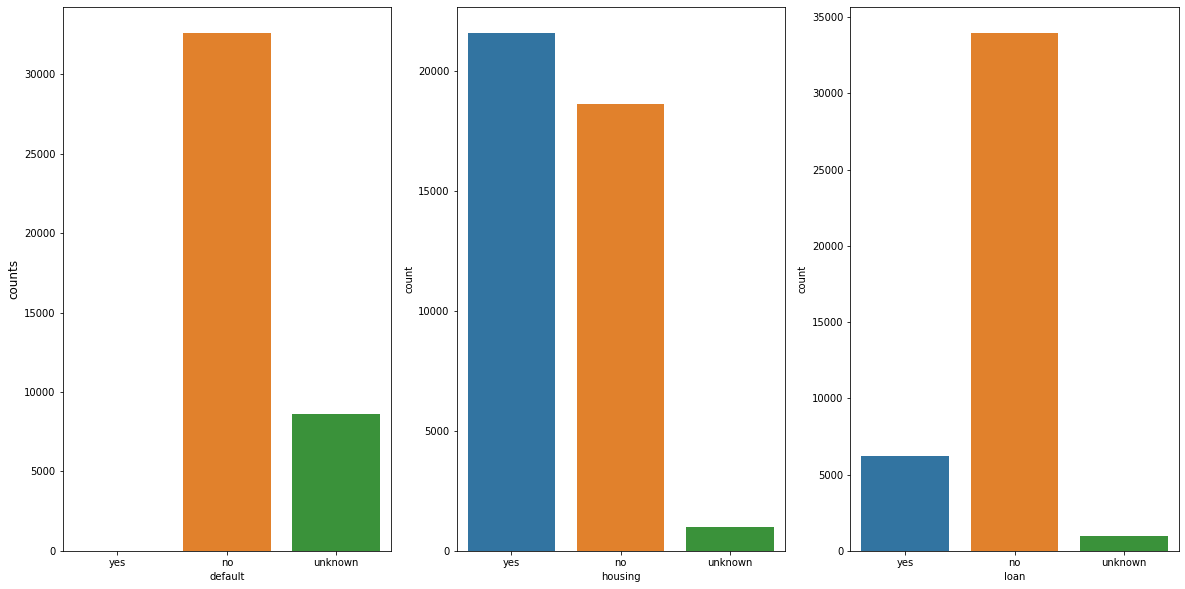

In [98]:
import seaborn as sns
# three subplot on columns default, housing, loan
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

sns.countplot(x='default',data=df,ax=ax1,order=['yes','no','unknown'])
ax1.set_title('default column',fontsize=12)
ax1.set_ylabel('counts',fontsize=12)

sns.countplot(x='housing',data=df,ax=ax2,order=['yes','no','unknown'])
ax1.set_title('housing column',fontsize=12)
ax1.set_ylabel('counts',fontsize=12)

sns.countplot(x='loan',data=df,ax=ax3,order=['yes','no','unknown'])
ax1.set_title('',fontsize=12)
ax1.set_ylabel('counts',fontsize=12)

# The plots below have some information on features default, housing and loan. 
# Comparing between these three features, it's quite different between each other
# for default column, most of the data points are in 'no' value
# for housing column, largest group of data points are in yes, 
# and second majority data points are in no, and unknow are very few comparing to the yes and no 
# For the loan column, most of the data points are in no value, and a small amount of data points are yes, 
# and very few of unknown

# Innterpreting the practical meaning of these plots are :
# most of the clients in this dataset didn't have default credit, and small amount of them are unknown
# most of the clients do have housing, and a little less than people who have housing, a large amount of 
# people don't have housing, and very few people are unknown about wether they have housing or not
# Most of the clients have no loan, a small amount of clients have loan, and very few of the clients 
# information about loan are unknown

In [29]:
#see how many clients said yes to previous contacts even before this campaign
print(df['poutcome'].value_counts())
print(type(df['poutcome']))

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
<class 'pandas.core.series.Series'>


In [36]:
#find out the iloc indexes for these previous responses which are success
for i in range(0,41186):
    if df.iloc[i]['poutcome']== 'success':
         print(i,df.iloc[i]['poutcome'],df.iloc[i]['y'])

24108 success no
24264 success no
24279 success no
24397 success no
24482 success no
24613 success yes
24799 success no
24850 success no
24910 success no
25053 success no
25274 success no
25293 success no
25454 success no
25497 success no
25504 success no
25519 success yes
25703 success no
25853 success yes
25872 success no
25996 success no
26104 success no
26166 success no
26168 success no
26194 success no
26197 success no
26243 success no
26368 success no
26549 success no
26748 success no
26972 success no
27050 success no
27373 success no
27467 success no
27478 success no
27658 success no
27764 success yes
27768 success yes
27840 success no
27991 success no
28021 success no
28101 success no
28122 success no
28167 success yes
28222 success no
28298 success no
28622 success no
28676 success yes
28709 success no
28790 success no
28830 success no
28844 success no
29155 success no
29166 success yes
29278 success no
29306 success no
29348 success yes
29498 success no
29503 success no
29510

38046 success yes
38047 success yes
38053 success yes
38063 success yes
38071 success yes
38075 success yes
38077 success yes
38079 success no
38081 success yes
38082 success yes
38084 success yes
38086 success no
38087 success no
38088 success no
38089 success yes
38091 success yes
38106 success yes
38109 success yes
38111 success yes
38113 success yes
38114 success yes
38117 success yes
38128 success no
38138 success yes
38148 success yes
38153 success no
38154 success yes
38158 success yes
38159 success no
38165 success no
38173 success yes
38179 success yes
38182 success no
38199 success yes
38209 success no
38212 success yes
38230 success yes
38238 success no
38245 success no
38250 success no
38269 success yes
38270 success yes
38274 success yes
38278 success no
38283 success yes
38287 success no
38312 success yes
38314 success no
38316 success yes
38319 success yes
38325 success yes
38330 success yes
38333 success no
38342 success no
38348 success yes
38352 success no
38354 succe

39867 success yes
39868 success yes
39870 success no
39871 success yes
39872 success no
39873 success no
39874 success no
39880 success yes
39881 success yes
39883 success yes
39893 success yes
39894 success no
39896 success yes
39899 success yes
39901 success no
39905 success yes
39906 success yes
39907 success yes
39908 success no
39911 success yes
39912 success yes
39915 success yes
39918 success no
39919 success no
39929 success no
39941 success yes
39943 success no
39944 success no
39953 success yes
39955 success yes
39958 success yes
39960 success yes
39964 success yes
39974 success yes
39975 success yes
39976 success yes
39980 success no
39981 success no
39982 success yes
39983 success yes
39993 success yes
39998 success yes
39999 success yes
40014 success yes
40015 success yes
40017 success yes
40020 success no
40022 success no
40024 success no
40026 success yes
40030 success yes
40038 success yes
40040 success no
40044 success no
40048 success yes
40050 success yes
40053 succe

In [41]:
# and compare if these previous success responses clients also said yes to this campaign this time
count_previous_now=0
for i in range(0,41186):
    if df.iloc[i]['poutcome']=='success' and df.iloc[i]['y']=='yes':
        count_previous_now +=1


894


In [43]:
#count the total number of clients who said yes to this campaign and also had success previous outcome before
print(count_previous_now)

894


In [44]:
# According to the previous result on column 'poutcome', 35563 nonexistence poutcome, 4252 failure poutcome , and 1373 success poutcome
# The total number of 'yes' response output in this dataset is 4640, and among these 'yes' responses, there are 894 'yes' responses have previous 'success' outcomes, which mean
print(894/4640)
# It can be assumed that,about 19.26% 'yes' response have already did success business with this bank before. 
# However,further analysis needs to be done for analyzing the relationships between the poutcome column and y column

0.19267241379310346


In [95]:
# take out column 'duration', and group by based on 'y' column to 'yes'and 'no'
df_yes = df[df['y'] == 'yes']
df_no = df[df['y']=='no']
#print(df_yes.head(10))
#print(df_no.head(10))
df_yes_duration = df_yes['duration']
df_no_duration = df_no['duration']
print(df_yes_duration.head(10))
print(df_no_duration.head(10))

75     1575
83     1042
88     1467
129     579
139     461
182     673
286     935
388    1201
389    1030
446    1623
Name: duration, dtype: int64
0    261
1    149
2    226
3    151
4    307
5    198
6    139
7    217
8    380
9     50
Name: duration, dtype: int64


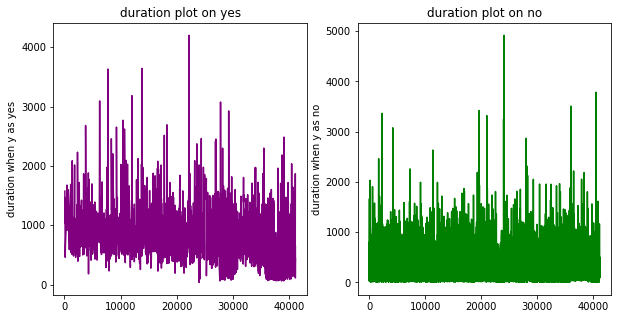

In [65]:
#plot the column 'duration' based on 'y' yes or no
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df_yes_duration, color='purple')
plt.ylabel('duration when y as yes')
plt.title('duration plot on yes')

plt.subplot(1, 2, 2)
plt.plot(df_no_duration, color='green')
plt.ylabel('duration when y as no')
plt.title('duration plot on no')
plt.show()
# The two plots below shows some difference between duration on yes and duration on no
# first plot shows majority of the data points are within 200-2500, the plot on the right 
# shows that majority of the data points are between 0-2000

# To interpret the info based on the real meaning of banking campagin, it can be assumed that 
# clients who agreed to do deposit with the bank, were mostly spent more time taling with the bank agent 
# And the clients who refused to do the deposit spent less time with the bank agent
# this can be a fator to be dig deeper later for building model 

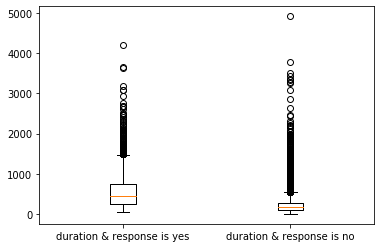

In [81]:
# after saw the simple plots above, I decided to plot box plots based on duration column for yes and no condition

data = [df_yes_duration,df_no_duration]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['duration & response is yes', 'duration & response is no'])
plt.show()
# According to the box plots below, it clearly shows that when 'y' is yes, the duration values are clearly higher than when 'y' is no
# and when y is no, duration values have more outliers accodring to the plots below, further analysis should be done on this matter
# Also duration with yes response data has much higher median value than duration with no response

In [83]:
# Here I will conduct same method on column "previous", to see wether the number of previous contacts before the campagin matters to the result

# take out column 'previous', and group by based on 'y' column to 'yes'and 'no'
df_yes = df[df['y'] == 'yes']
df_no = df[df['y']=='no']
#print(df_yes.head(10))
#print(df_no.head(10))
df_yes_previous = df_yes['previous']
df_no_previous = df_no['previous']



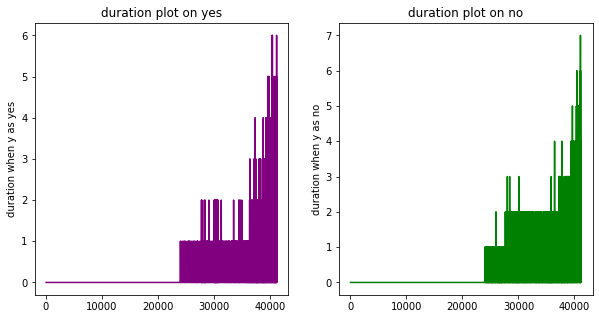

In [84]:
#plot the column 'duration' based on 'y' yes or no
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df_yes_previous, color='purple')
plt.ylabel('duration when y as yes')
plt.title('duration plot on yes')

plt.subplot(1, 2, 2)
plt.plot(df_no_previous, color='green')
plt.ylabel('duration when y as no')
plt.title('duration plot on no')
plt.show()

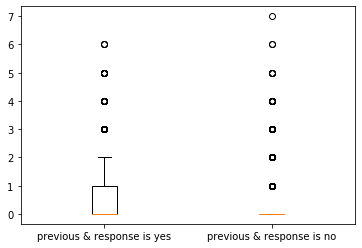

In [85]:
# after saw the simple plots above, I decided to plot box plots based on duration column for yes and no condition

data_previous = [df_yes_previous,df_no_previous]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data_previous)
ax.set_xticklabels(['previous & response is yes', 'previous & response is no'])
plt.show()
# According to the random plots above and the box plots below, it's clear to see 
#that there is no clear difference on 'previous' when based on 'y' as yes and 'y' as no

In [86]:
#plot the correlation plot of the whole dataset which will help seeing if there is and pattern or trend or close relationship/correlation 
# between columns(variables), also this can help do feature selection/dimension reduction and helping build a fit model for dataset

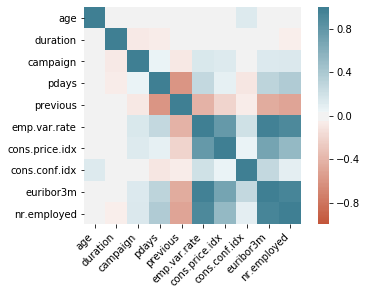

In [92]:
#plot correlation plot using seaborn heatmap function
corr = df.corr()
ax_heatmap = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax_heatmap.set_xticklabels(
    ax_heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# From the heatmap above, it shows there are a few features have relatively strong positive and negative 
#relationship with each other 
# like euribor3m and nr.employmed has pretty strong positive relationship
# feature previous has some negative relationship with nr.employed feature
# emp.var.rate has strong positive nr.employed
#emp.var.rate has strong positive relationship with euribor3m
# previous column has strong negative relationship with pdays
# cons.price.idx has some positive relatioship with emp.var.rate
#all the corrolation relationships in this heatmap are very good hint to build a fit model later


In [22]:
#create a subset of data as clients demographic data
demographic=df.iloc[:,0:7]
#print(demographic)

In [49]:
#y = pd.get_dummies(df['y'])
#print(y)

In [50]:
#print(type(df))
#predictiony=df['y']
#variables=df.iloc[:,:20]
#print(variables)
#print(variables)